In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [220]:
df=pd.read_excel('D:/Megha/Desktop/DS assignments/Assignment 18 Forecasting/CocaCola_Sales_Rawdata.xlsx')
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [221]:
df.dtypes

Quarter     object
Sales      float64
dtype: object

In [222]:
#extract year and quarter values as separate columns
df['Q']=df['Quarter'].str[0:2]
df['Year']=df['Quarter'].str[3::]
df

,Quarter,Sales,Q,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87
5,Q2_87,2104.411995,Q2,87
6,Q3_87,2014.362999,Q3,87
7,Q4_87,1991.746998,Q4,87
8,Q1_88,1869.049999,Q1,88
9,Q2_88,2313.631996,Q2,88


In [223]:
df.dtypes

Quarter     object
Sales      float64
Q           object
Year        object
dtype: object

In [224]:
q_dummy=pd.DataFrame(pd.get_dummies(df['Q']))
q_dummy

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [225]:
df=pd.concat([df,q_dummy],axis=1)
df

,Quarter,Sales,Q,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0
5,Q2_87,2104.411995,Q2,87,0,1,0,0
6,Q3_87,2014.362999,Q3,87,0,0,1,0
7,Q4_87,1991.746998,Q4,87,0,0,0,1
8,Q1_88,1869.049999,Q1,88,1,0,0,0
9,Q2_88,2313.631996,Q2,88,0,1,0,0


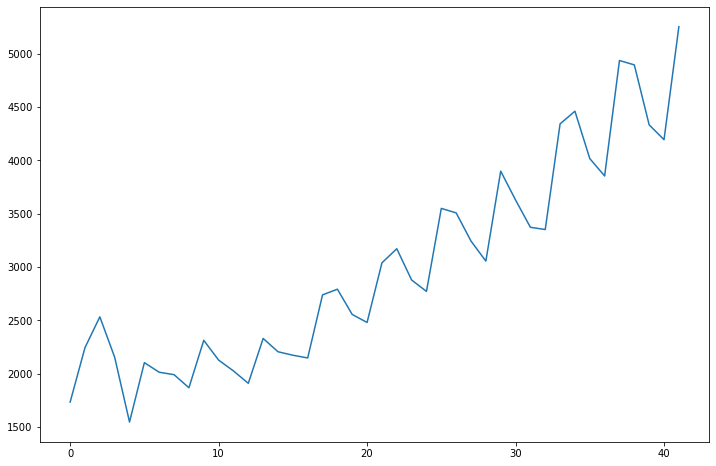

In [226]:
#plot 
plt.figure(figsize=(12,8))
plt.plot(df['Sales'])

<AxesSubplot:xlabel='Q', ylabel='Sales'>

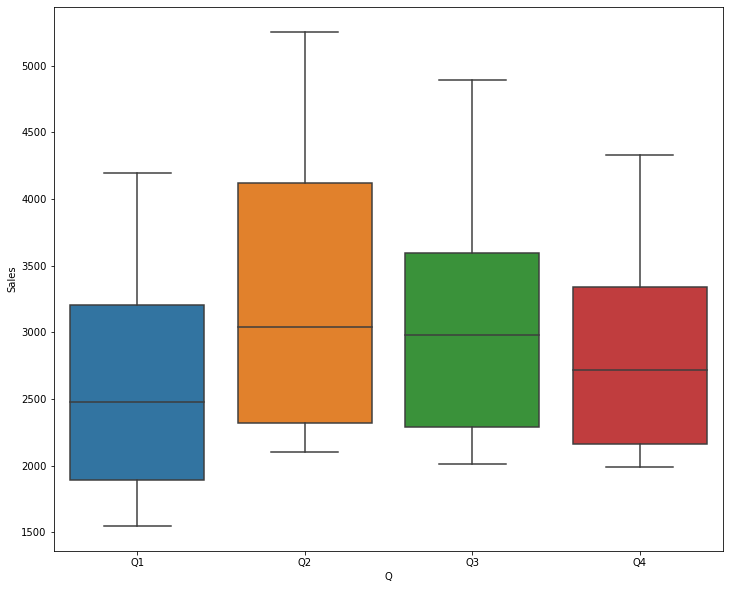

In [227]:
#boxplot
sns.boxplot(x='Q',y='Sales',data=df)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

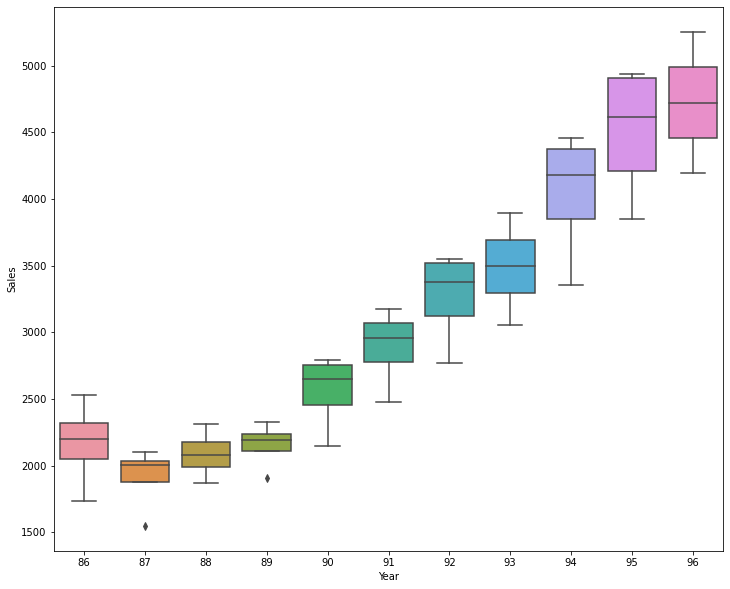

In [228]:
sns.boxplot(x='Year',y='Sales',data=df)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

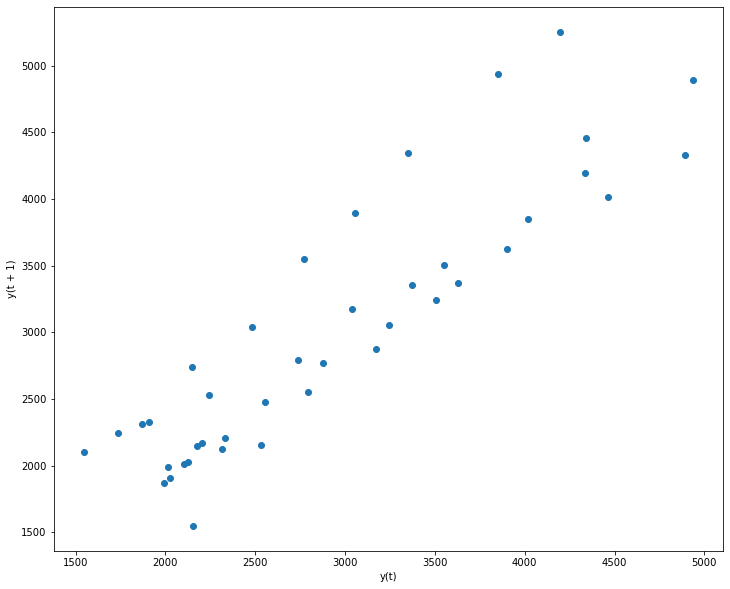

In [229]:
from pandas.plotting import lag_plot
lag_plot(df['Sales'])

<AxesSubplot:xlabel='Year', ylabel='Sales'>

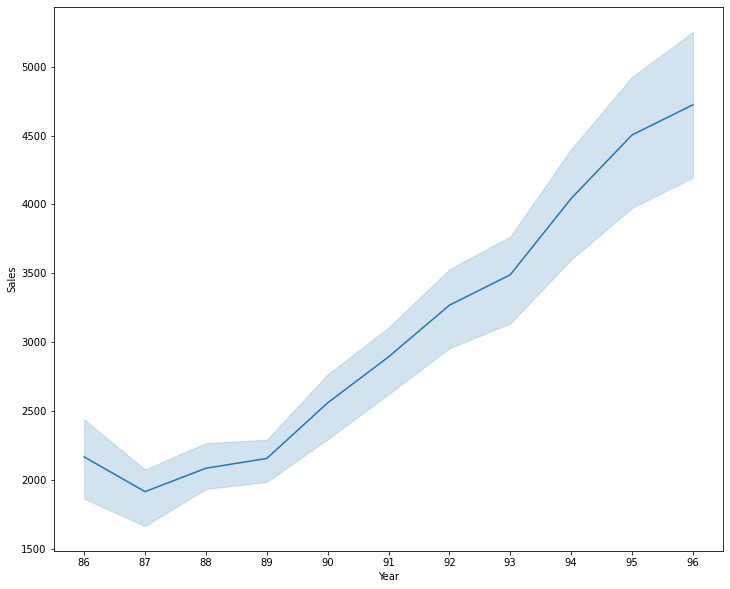

In [230]:
sns.lineplot(x='Year',y='Sales',data=df)

<AxesSubplot:xlabel='Q', ylabel='Sales'>

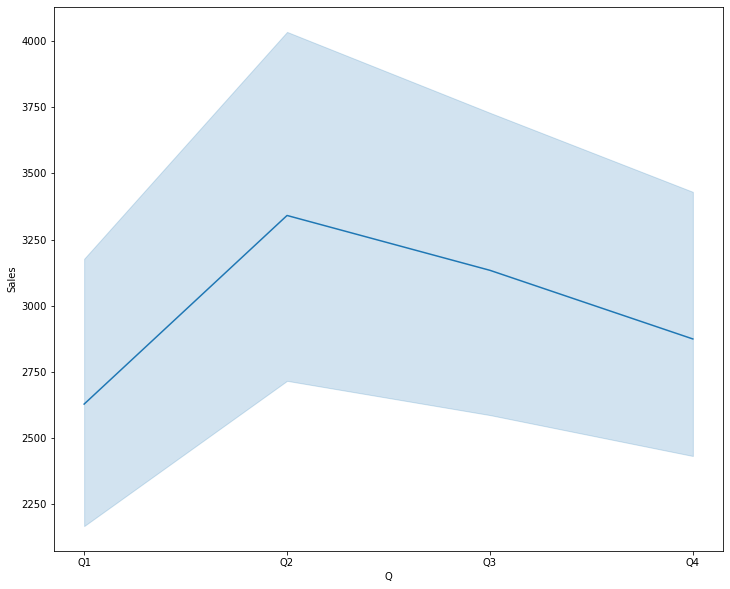

In [231]:
sns.lineplot(x='Q',y='Sales',data=df)

<AxesSubplot:xlabel='Q', ylabel='Year'>

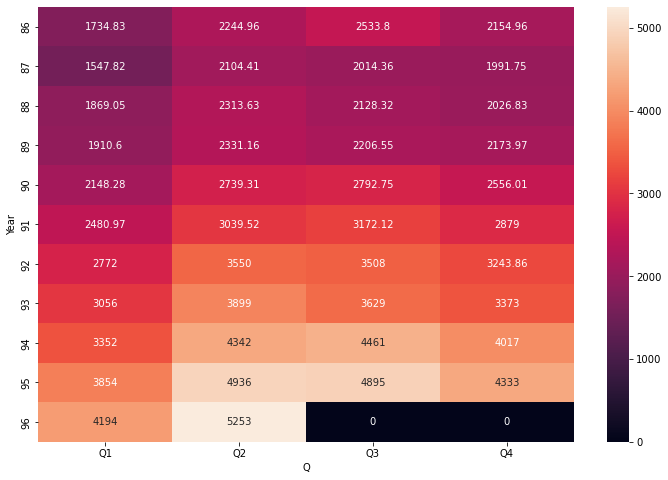

In [232]:
plt.figure(figsize=(12,8))
heat_map=pd.pivot_table(data=df,values='Sales',index='Year',columns='Q',aggfunc='mean',fill_value=0)
sns.heatmap(heat_map,annot=True,fmt='g')

In [233]:
df_train=df.head(35)
df_train

,Quarter,Sales,Q,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0
5,Q2_87,2104.411995,Q2,87,0,1,0,0
6,Q3_87,2014.362999,Q3,87,0,0,1,0
7,Q4_87,1991.746998,Q4,87,0,0,0,1
8,Q1_88,1869.049999,Q1,88,1,0,0,0
9,Q2_88,2313.631996,Q2,88,0,1,0,0


In [234]:
df_test=df.tail(7)
df_test

,Quarter,Sales,Q,Year,Q1,Q2,Q3,Q4
35,Q4_94,4017.0,Q4,94,0,0,0,1
36,Q1_95,3854.0,Q1,95,1,0,0,0
37,Q2_95,4936.0,Q2,95,0,1,0,0
38,Q3_95,4895.0,Q3,95,0,0,1,0
39,Q4_95,4333.0,Q4,95,0,0,0,1
40,Q1_96,4194.0,Q1,96,1,0,0,0
41,Q2_96,5253.0,Q2,96,0,1,0,0


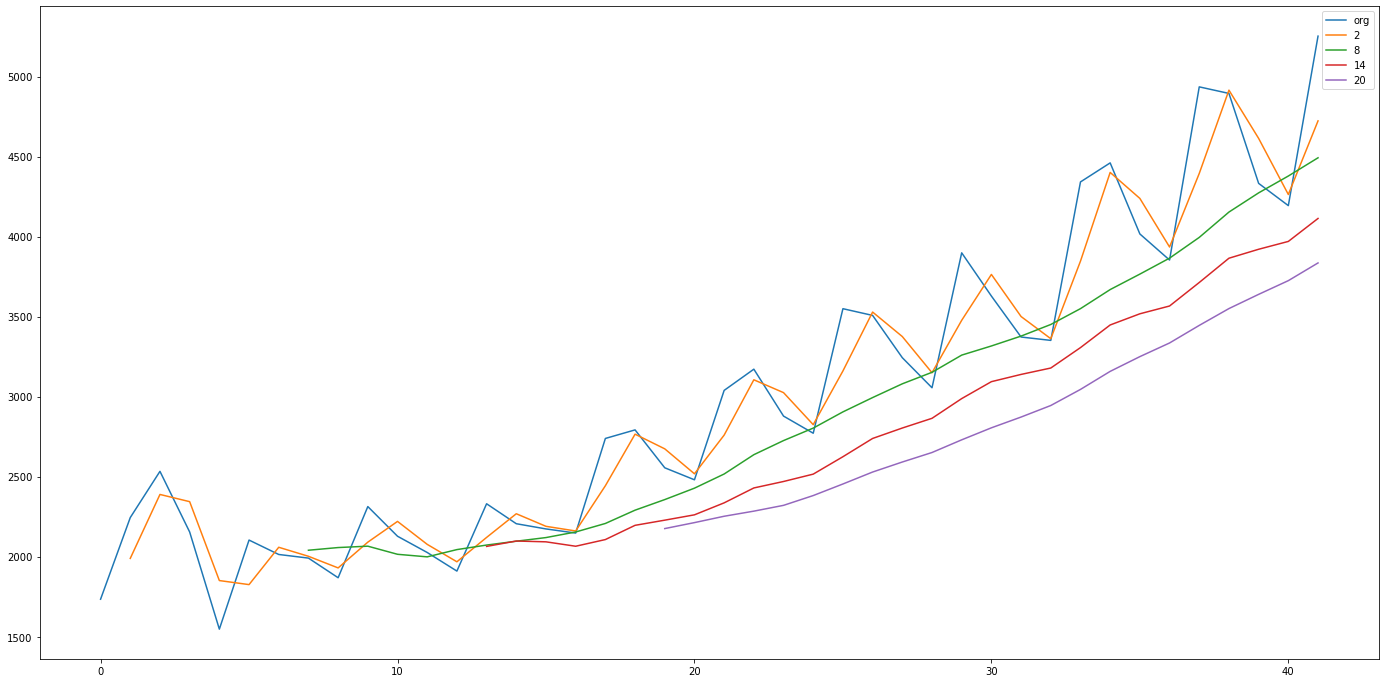

In [235]:
#plot for moving average
plt.figure(figsize=(24,12))
df.Sales.plot(label='org')
for i in range (2,24,6):
    df['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')


C:\Users\Megha\AppData\Local\Temp/ipykernel_4452/3358521271.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  dec_ts=seasonal_decompose(df.Sales,freq=12)


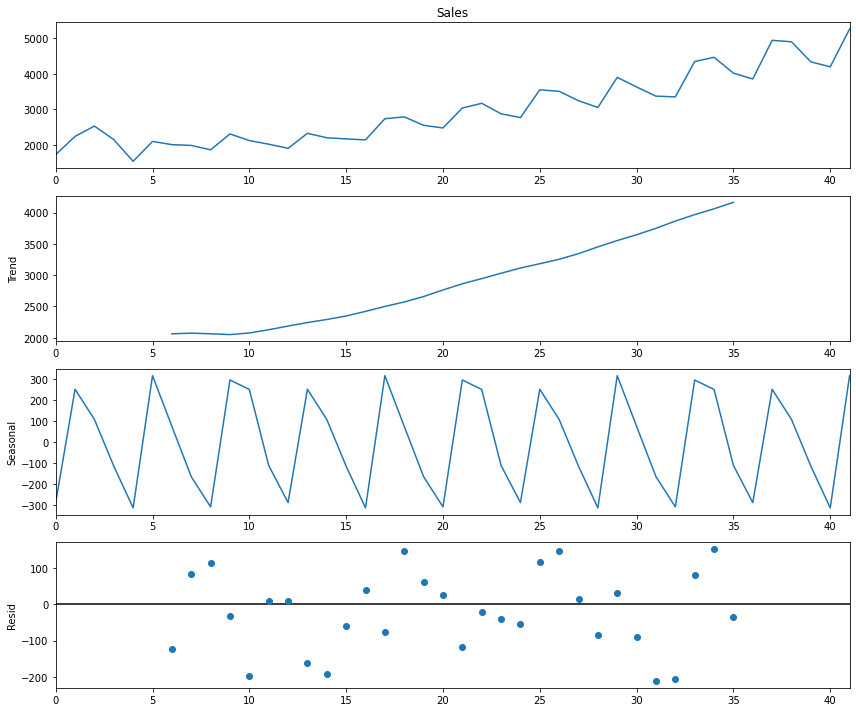

In [236]:
# Time series decomposition plot
dec_ts=seasonal_decompose(df.Sales,freq=12)
dec_ts.plot()
plt.show()

In [237]:
#data shows increasing treand and seasonal component

C:\Users\Megha\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


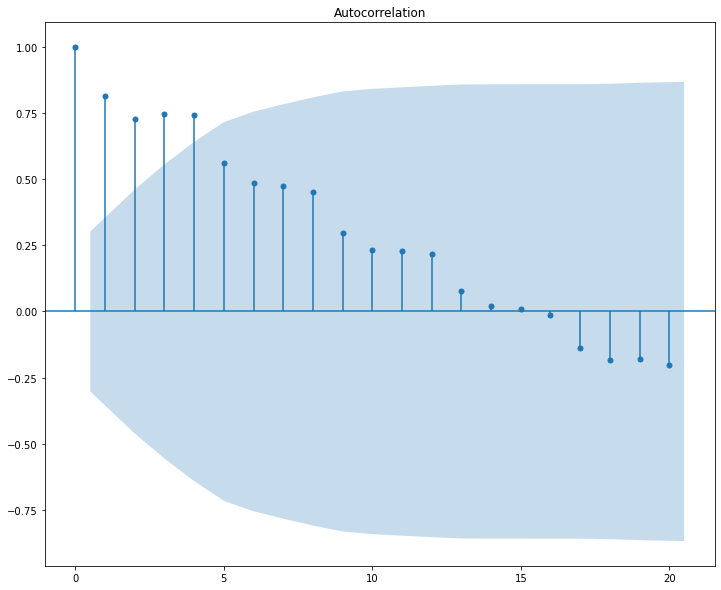

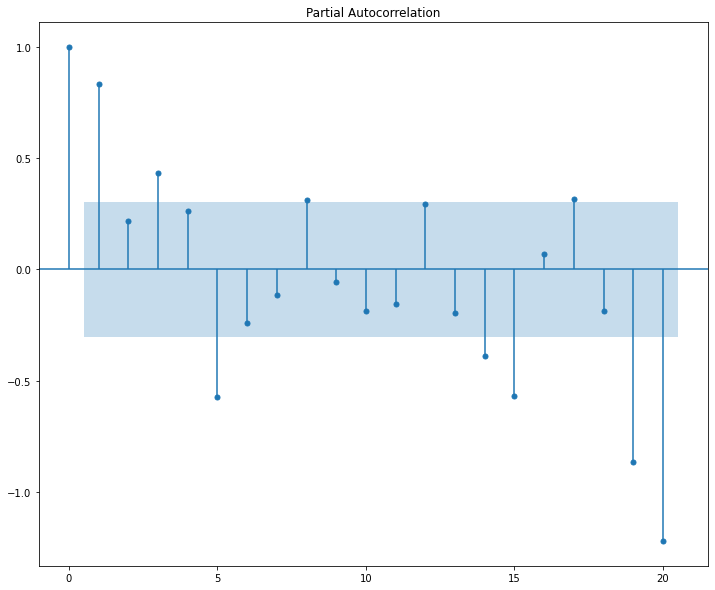

In [238]:
#ACF and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Sales,lags=20)
tsa_plots.plot_pacf(df.Sales,lags=20)
plt.show()

In [239]:
# Interpretation
# ACF plot of moving average (MA) processs cuts off after lag q (16)
# PACF plot for autoregressive (AR) component is sifnificant upto lag p (17)

In [240]:
#Data based forecasting

In [241]:
def rmse(org, pred):
    RMSE=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return RMSE

In [252]:
#Simple exponential method
ses_model=SimpleExpSmoothing(df_train['Sales']).fit()
pred_ses=ses_model.predict(start=df_test.index[0],end=df_test.index[-1])
print(pred_ses)
rsme(df_test.Sales,pred_ses)

35    4289.300628
36    4289.300628
37    4289.300628
38    4289.300628
39    4289.300628
40    4289.300628
41    4289.300628
dtype: float64


C:\Users\Megha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


532.9747246731538

In [253]:
#Holt method
hw=Holt(df_train['Sales']).fit()
prd_hw=hw.predict(start=df_test.index[0],end=df_test.index[-1])
print(prd_hw)
rsme(prd_hw,df_test.Sales)

35    4373.513997
36    4535.678664
37    4697.843331
38    4860.007998
39    5022.172665
40    5184.337332
41    5346.501999
dtype: float64


C:\Users\Megha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


549.5713506689235

In [244]:
#holt winters exponential smoothing with additive seasonality and additive trend
hwa=ExponentialSmoothing(df_train['Sales'],seasonal='add',trend='add',seasonal_periods=16).fit()
pred_hwa=hwa.predict(start=df_test.index[0],end=df_test.index[-1])
print(pred_hwa)
rsme(pred_hwa,df_test.Sales)

C:\Users\Megha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


35    4226.053068
36    3939.867307
37    4537.020687
38    4593.090125
39    4482.405273
40    4439.177277
41    5109.895033
dtype: float64


240.33408550287308

In [245]:
#holt winters exponential smoothing with multiplicative seasonality and additive trend
hwm=ExponentialSmoothing(df_train['Sales'],seasonal='mul',trend='add',seasonal_periods=16).fit()
pred_hwm=hwm.predict(start=df_test.index[0],end=df_test.index[-1])
print(pred_hwm)
rsme(pred_hwm,df_test.Sales)

C:\Users\Megha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


35    4004.506964
36    3469.594740
37    4175.315716
38    4190.050460
39    3833.332296
40    3657.769209
41    4606.123467
dtype: float64


557.9526910590579

In [246]:
#least error is for holt winters exponential smoothing with additive seasonality and additive trend

In [247]:
#Model based forecasting

In [248]:
df['t']=np.arange(1,43)
df['t_sq']=df['t']*df['t']
df['log_sales']=np.log(df['Sales'])
df

,Quarter,Sales,Q,Year,Q1,Q2,Q3,Q4,t,t_sq,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574


In [249]:
df_tr=df.head(31)
df_tr

,Quarter,Sales,Q,Year,Q1,Q2,Q3,Q4,t,t_sq,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574


In [250]:
df_te=df.tail(11)
df_te

,Quarter,Sales,Q,Year,Q1,Q2,Q3,Q4,t,t_sq,log_sales
31,Q4_93,3373.0,Q4,93,0,0,0,1,32,1024,8.123558
32,Q1_94,3352.0,Q1,94,1,0,0,0,33,1089,8.117312
33,Q2_94,4342.0,Q2,94,0,1,0,0,34,1156,8.376090
34,Q3_94,4461.0,Q3,94,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,Q4,94,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,95,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,95,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,95,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,95,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,96,1,0,0,0,41,1681,8.341410


In [258]:
# linear model
import statsmodels.formula.api as smf
lm=smf.ols('Sales~t',data=df_tr).fit()
pred_lm=pd.Series(lm.predict(pd.DataFrame(df_te['t'])))
rsme(pred_lm,df_te['Sales'])

708.3692635413488

In [257]:
#exp model
exp=smf.ols('log_sales~t',data=df_tr).fit()
pred_exp=pd.Series(exp.predict(pd.DataFrame(df_te['t'])))
rsme(pred_exp,df_te['Sales'])

4304.984116020796

In [259]:
#quadratic model
quad=smf.ols('Sales~t_sq',data=df_tr).fit()
pred_quad=pd.Series(quad.predict(pd.DataFrame(df_te['t_sq'])))
rsme(pred_quad,df_te['Sales'])

449.09394047607213

In [260]:
#additive seasonality model
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=df_tr).fit()
pred_add_sea = pd.Series(add_sea.predict(df_te[['Q1', 'Q2', 'Q3','Q4']]))
rsme(pred_add_sea,df_te['Sales'])

1807.0337453573381

In [261]:
#additive quad seasonality model
add_sea_Quad = smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=df_tr).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(df_te[['Q1','Q2','Q3','Q4','t','t_sq']]))
rsme(pred_add_sea_quad,df_te['Sales'])

435.9469581762961

In [262]:
#multiplicative seasonality model
mul_sea_Quad = smf.ols('log_sales~Q1+Q2+Q3+Q4',data=df_tr).fit()
pred_mul_sea_quad = pd.Series(mul_sea_Quad.predict(df_te[['Q1','Q2','Q3','Q4']]))
rsme(pred_mul_sea_quad,df_te['Sales'])

4305.448089632876

In [263]:
#multiplicative additive seasonality model
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = df_tr).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(df_te))
rsme(pred_Mult_add_sea,df_te['Sales'])

4304.994470554426

In [266]:
list=[['Simple Exponential Method',rsme(pred_ses,df_test.Sales)],['Holt Method',rsme(prd_hw,df_test.Sales)],['Holt-winters exp smoothing with additive T&S',rsme(pred_hwa,df_test.Sales)],['Holt-winters exp smoothing with mul S and add T',rsme(pred_hwm,df_test.Sales)],['linear model',rsme(pred_lm,df_te['Sales'])],['quadratic model',rsme(pred_quad,df_te['Sales'])],['exponential model',rsme(pred_exp,df_te['Sales'])],['additive quad S model',rsme(pred_add_sea_quad,df_te['Sales'])],['mult S model',rsme(pred_mul_sea_quad,df_te['Sales'])],['mas model',rsme(pred_Mult_add_sea,df_te['Sales'])],['add s model',rsme(pred_add_sea,df_te['Sales'])]]

In [267]:
res = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
res

,Model,RMSE_Value
0,Simple Exponential Method,532.974725
1,Holt Method,549.571351
2,Holt-winters exp smoothing with additive T&S,240.334086
3,Holt-winters exp smoothing with mul S and add T,557.952691
4,linear model,708.369264
5,quadratic model,449.093940
6,exponential model,4304.984116
7,additive quad S model,435.946958
8,mult S model,4305.448090
9,mas model,4304.994471


In [217]:
#least rsme is for Holt winters exponential smooting with additive trend and seasonality

In [269]:
#final model
final=ExponentialSmoothing(df['Sales'],seasonal='add',trend='add',seasonal_periods=16).fit()
pred_final=pd.Series(final.predict(start=df.index[0],end=df.index[-1]))

C:\Users\Megha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [272]:
pred_df = pd.DataFrame({'Actual' : df.Sales, 'Predicted' : pred_final})
pred_df

,Actual,Predicted
0,1734.827000,1704.812350
1,2244.960999,2319.274095
2,2533.804993,2455.488157
3,2154.962997,2185.751891
4,1547.818996,1815.221341
5,2104.411995,2271.557474
6,2014.362999,2040.538517
7,1991.746998,1767.316136
8,1869.049999,1770.037591
9,2313.631996,2427.994738


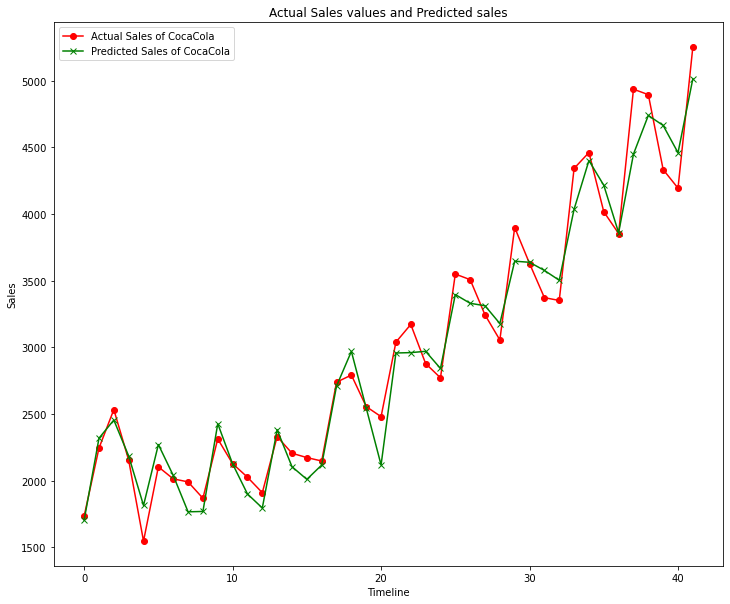

In [273]:
plt.plot(df.Sales, color='r',marker='o', label='Actual Sales of CocaCola')
plt.plot(pred_final, color='g',marker='x', label='Predicted Sales of CocaCola')

# Added titles and adjust dimensions
plt.title('Actual Sales values and Predicted sales')
plt.xlabel("Timeline")
plt.ylabel("Sales")
plt.legend()
plt.rcParams['figure.figsize'] = (12,10) 

plt.show()